Data Hackathon by **IIT Guwahati** and **AI Planet**
# Network Activity Anomaly Detection
By Anup Shinde

**Importing Necessary Libraries**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
train_data = pd.read_csv("Train_Data.csv")
test_data = pd.read_csv("Test_Data.csv")

**EDA and Preprocessing**

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

In [46]:
cat_cols = ['protocoltype', 'service', 'flag']
train_data = pd.get_dummies(train_data, columns=cat_cols)
test_data = pd.get_dummies(test_data, columns=cat_cols)

In [47]:
train_data = train_data.drop('service_tftp_u', axis=1)

In [48]:
train_data.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
1,0,1239,400,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
2,0,222,945,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,235,1380,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [49]:
train_data.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522,0.379964
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425,0.485380
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


Plots

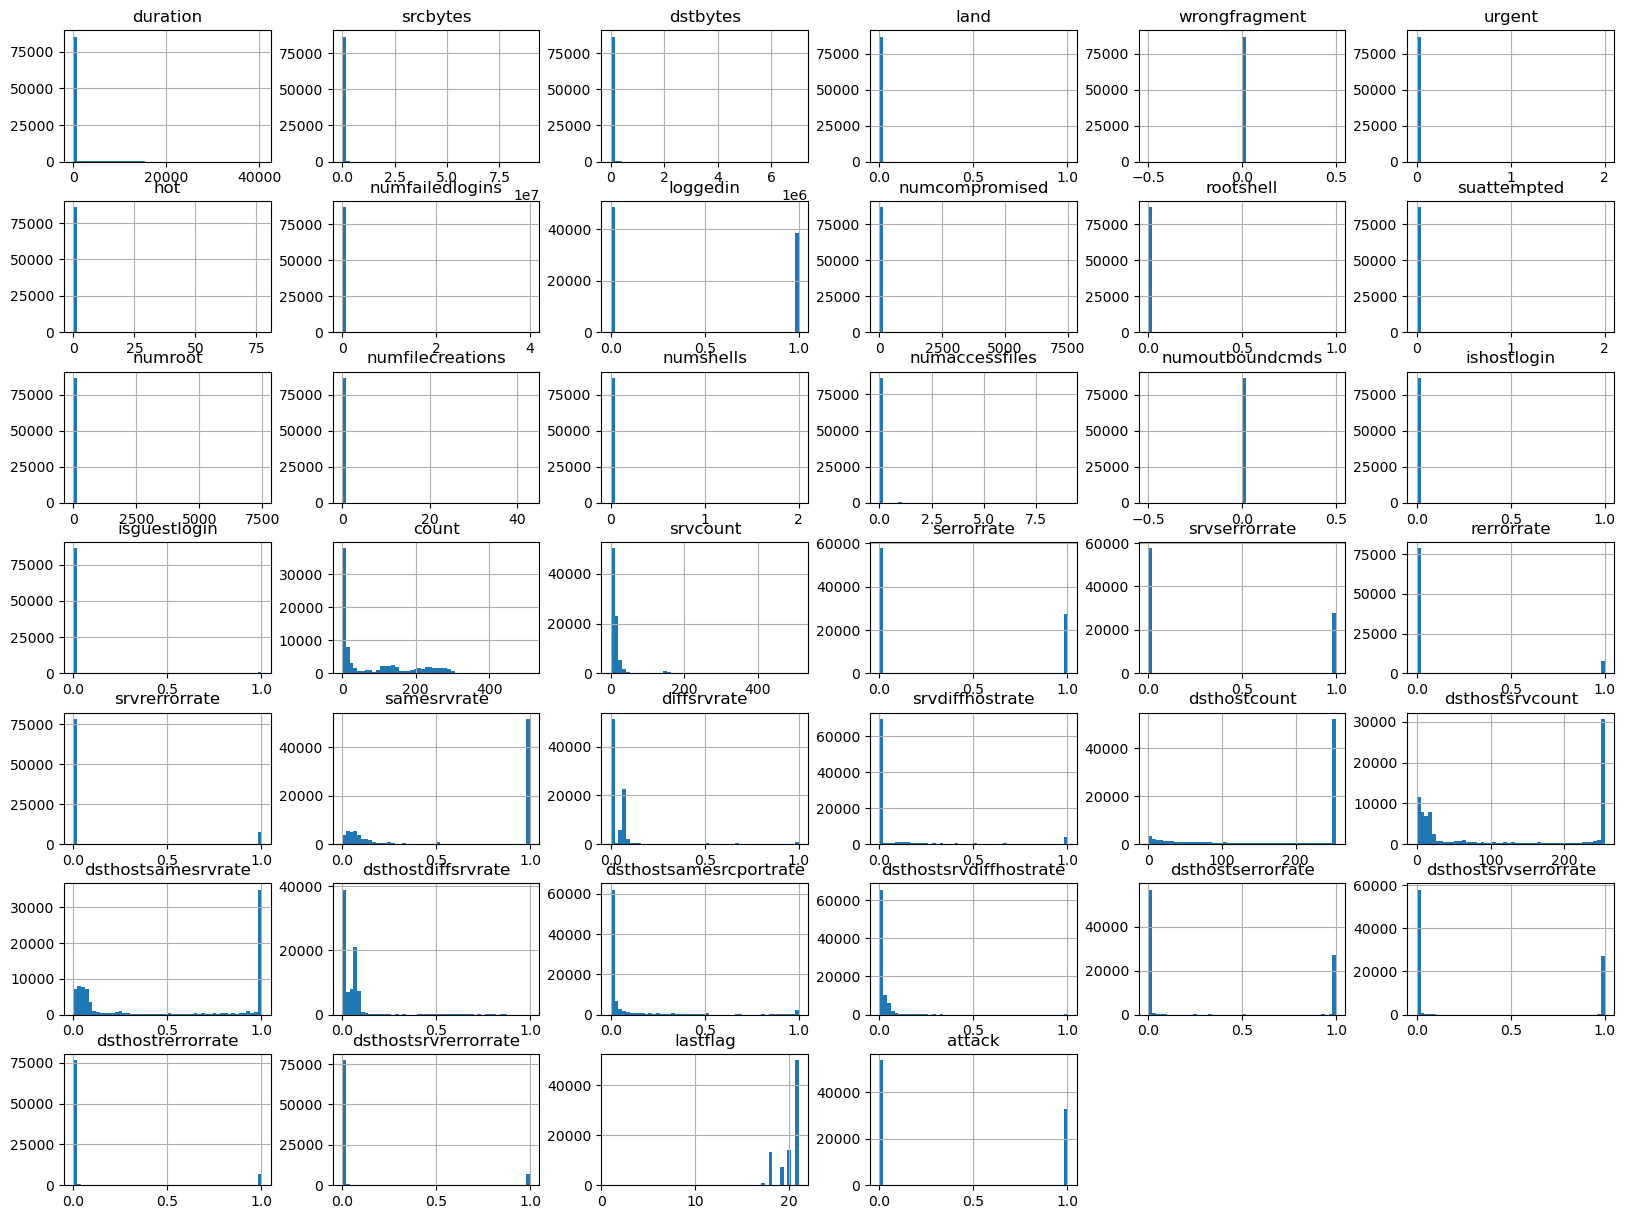

In [50]:
train_data.hist(bins=50, figsize=(20, 15))
plt.show()

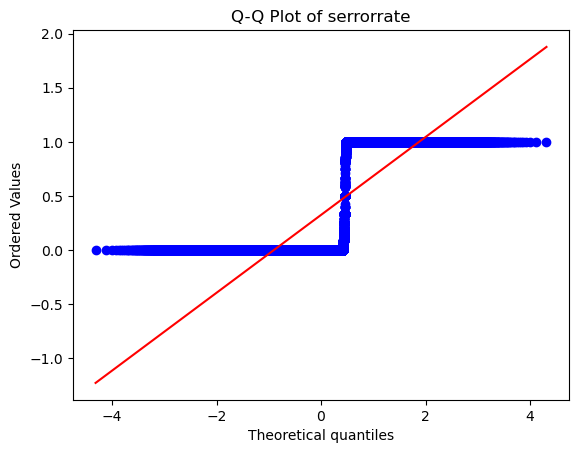

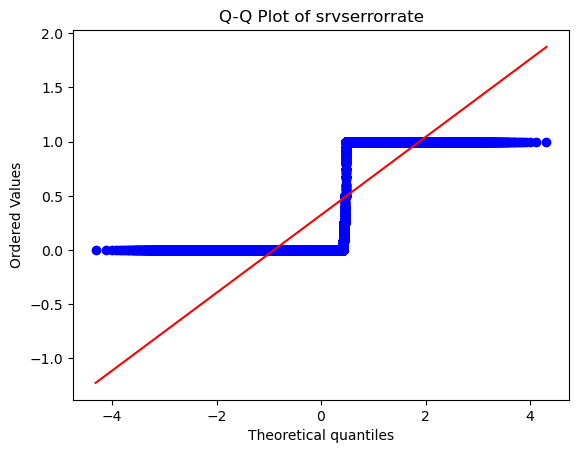

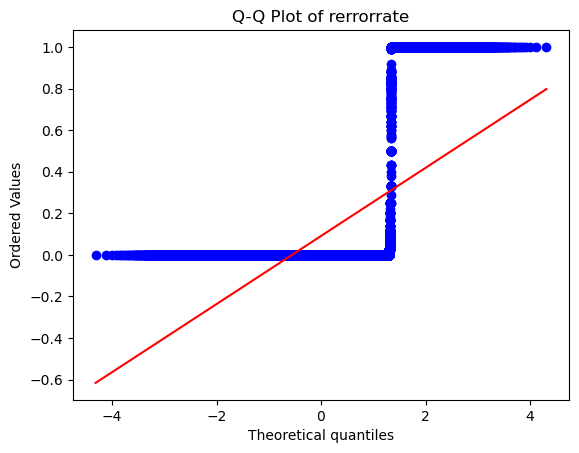

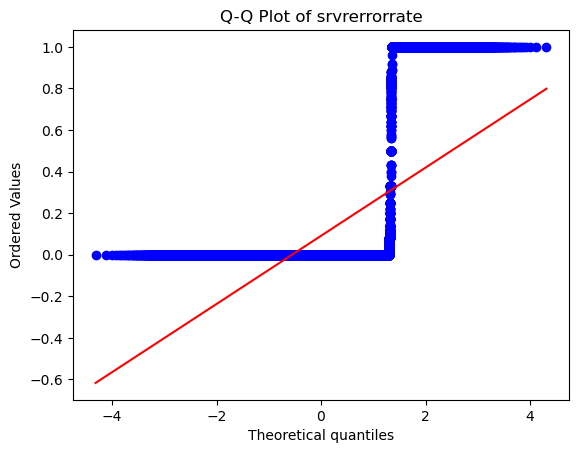

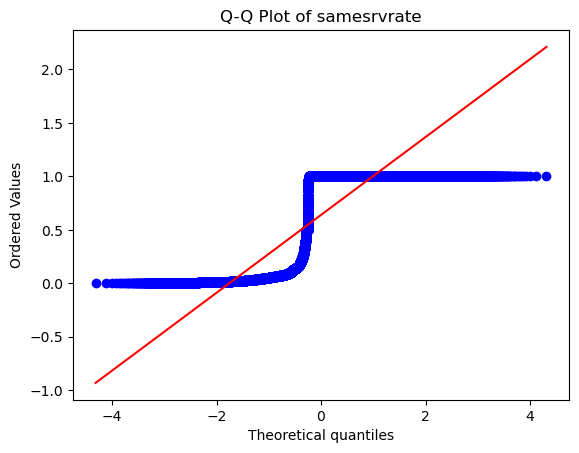

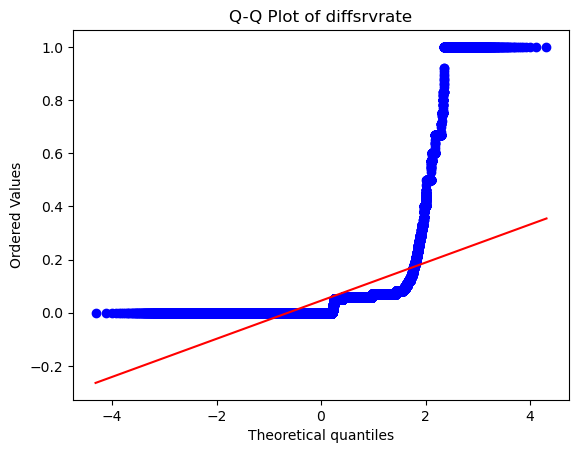

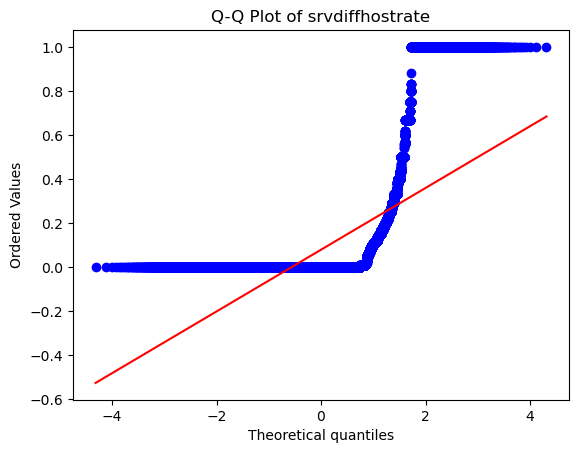

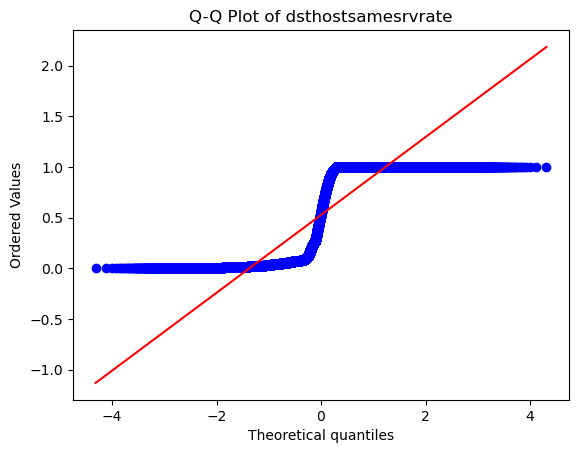

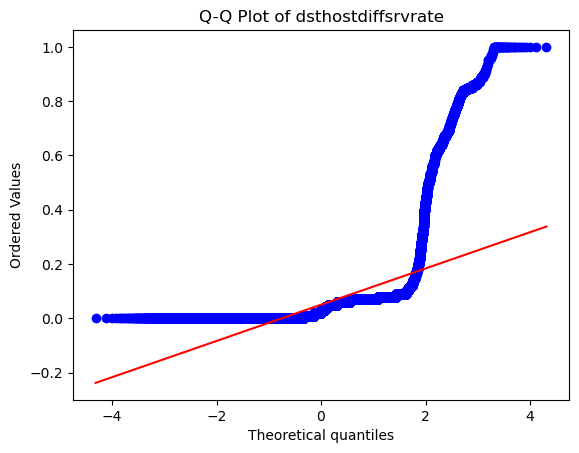

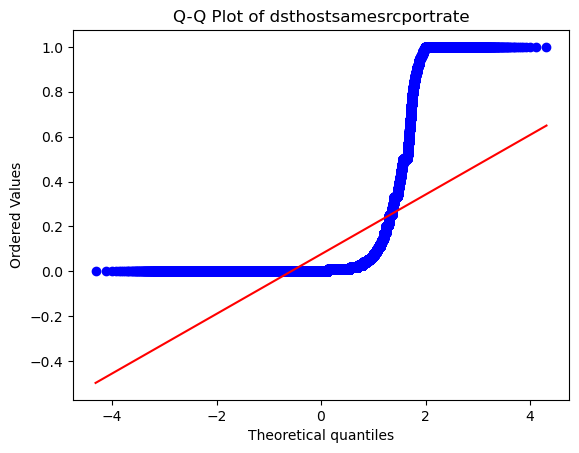

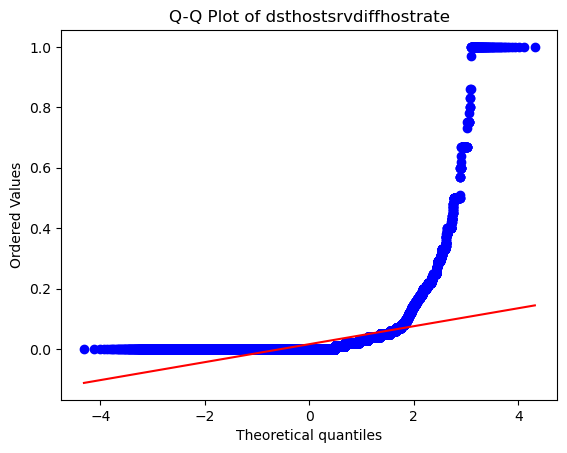

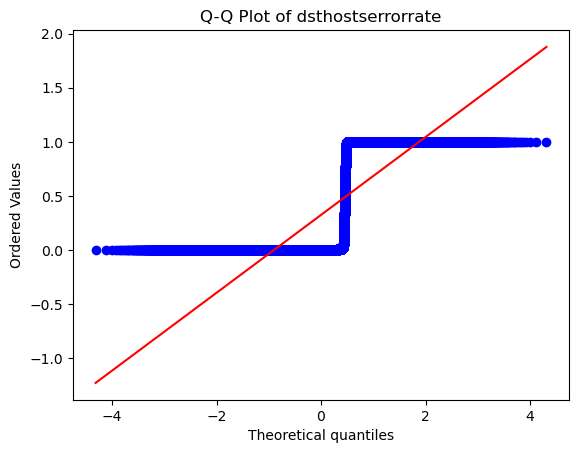

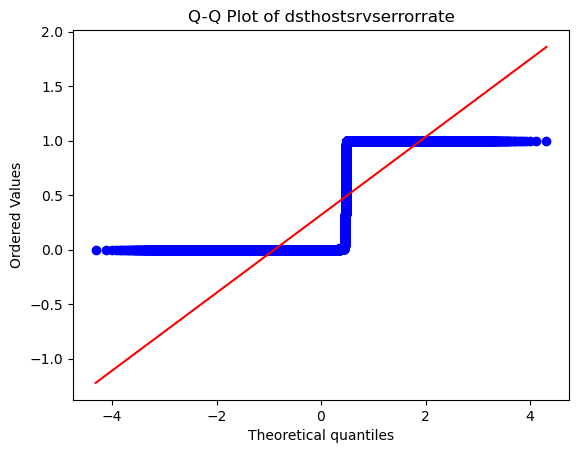

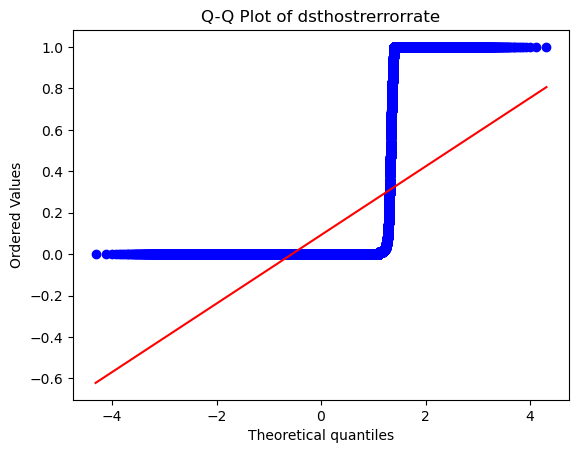

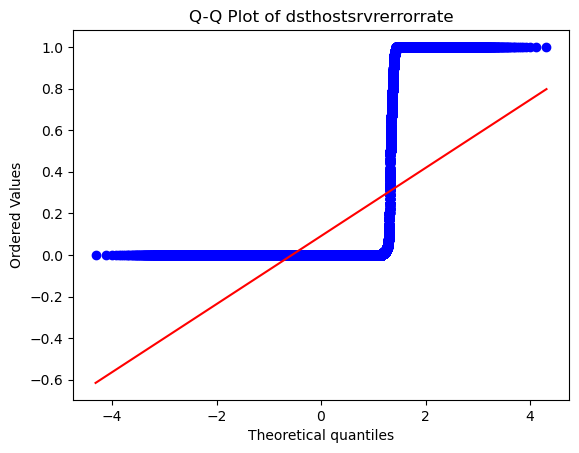

In [51]:
import scipy.stats as stats

for column in train_data.columns:
    if train_data[column].dtype == 'float64':
        stats.probplot(train_data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column}')
        plt.show()

Splitting Data

In [52]:
X = train_data.drop('attack', axis=1)
y = train_data['attack']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Developing Model**

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [55]:
##Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [56]:
##Random Forest Model (Bagging)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
##XGBoost Model (Gradient Boosting)
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**Model Training and Evaluation**

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

In [59]:
##Logistic Regression

print('Logistic Regression')
# Predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_pred_log_reg)
print("Classification Report:")
print(class_report)

# ROC AUC Score
y_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC AUC
roc_auc = roc_auc_score(y_test, y_probs_log_reg)
print(f"ROC AUC Score: {roc_auc:.2f}")

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10762
           1       1.00      1.00      1.00      6607

    accuracy                           1.00     17369
   macro avg       1.00      1.00      1.00     17369
weighted avg       1.00      1.00      1.00     17369

ROC AUC Score: 1.00


In [60]:
##Random Forest

print('Random Forest')
# Predictions on the test set
y_pred_rf = rf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Predict probabilities for ROC-AUC score
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_rf)
print(f"ROC-AUC Score: {roc_auc}")

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10762
           1       1.00      1.00      1.00      6607

    accuracy                           1.00     17369
   macro avg       1.00      1.00      1.00     17369
weighted avg       1.00      1.00      1.00     17369

ROC-AUC Score: 1.0


In [61]:
##XGBoost

print('XGBoost')
# Make predictions
y_pred_xgb = xgb.predict(X_test)       # Predicted class labels
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

# Evaluate performance
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs_xgb))

XGBoost
XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10762
           1       1.00      1.00      1.00      6607

    accuracy                           1.00     17369
   macro avg       1.00      1.00      1.00     17369
weighted avg       1.00      1.00      1.00     17369

ROC-AUC Score: 0.9999999437447968


AUPRC Graph

In [62]:
# Function to calculate AUPRC
def calculate_auprc(y_true, y_probs):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    return auc(recall, precision)

# Calculate AUPRC for each model
auprc_log_reg = calculate_auprc(y_test, y_probs_log_reg)
auprc_rf = calculate_auprc(y_test, y_probs_rf)
auprc_xgb = calculate_auprc(y_test, y_probs_xgb)

# Print AUPRC values
print(f"AUPRC for Logistic Regression: {auprc_log_reg}")
print(f"AUPRC for Random Forest: {auprc_rf}")
print(f"AUPRC for XGBoost: {auprc_xgb}")

AUPRC for Logistic Regression: 0.9999997709212249
AUPRC for Random Forest: 1.0
AUPRC for XGBoost: 0.9999999083913717


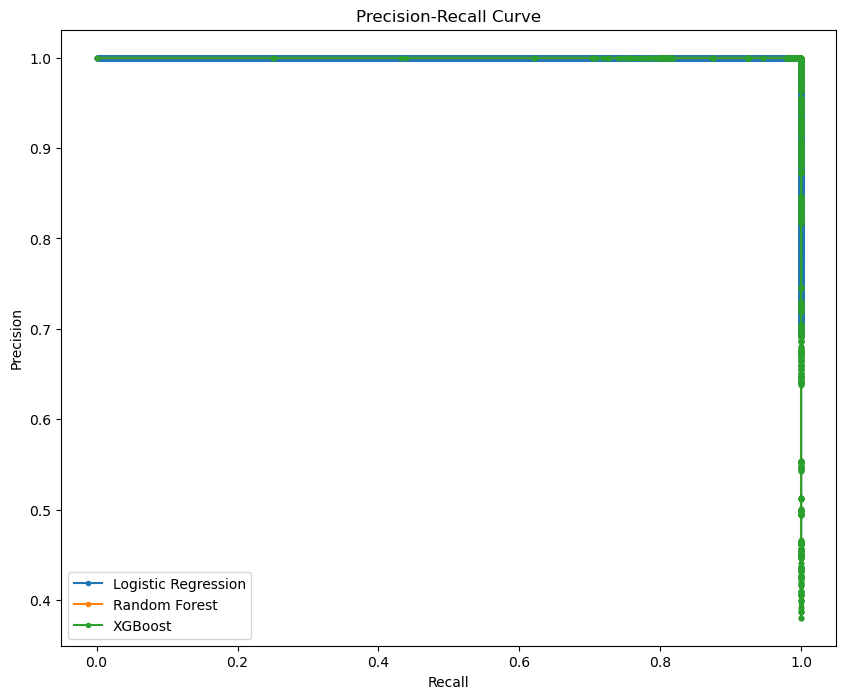

In [63]:
# Plot Precision-Recall curves
def plot_precision_recall_curve(y_true, y_probs, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.plot(recall, precision, marker='.', label=model_name)

plt.figure(figsize=(10, 8))
plot_precision_recall_curve(y_test, y_probs_log_reg, 'Logistic Regression')
plot_precision_recall_curve(y_test, y_probs_rf, 'Random Forest')
plot_precision_recall_curve(y_test, y_probs_xgb, 'XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Random Forest has best RO Score, Classification Report and AURPC. So, I will be using it as final model.

**Prediction on Test Features**

In [64]:
predictions = rf.predict(test_data)

**Saving Submission File**

In [70]:
# Save the predictions
submission = pd.DataFrame({'attack': predictions})
submission.to_csv('Sample_Submission.csv', index=False)

print("Submission saved successfully.")

Submission saved successfully.


In [71]:
submission.shape

(21712, 1)

In [68]:
test_data.shape

(21712, 116)